In [64]:
import numpy as np
import pandas as pd

In [65]:
input_data=pd.read_csv('/scores_data.csv')

In [66]:
input_data.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [67]:
input_data.shape

(149, 3)

In [68]:
input_data.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [69]:
input_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Batch   User_ID      Score   
0     False     False        False
1     False     False        False
2     False     False        False
3     False     False        False
4     False     False        False
..      ...       ...          ...
144   False     False        False
145   False     False        False
146   False     False        False
147   False     False        False
148   False     False        False

[149 rows x 3 columns]>

In [70]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


as we can see that the Column needs some adjusting in spacing and the object types need to converted to number type

In [71]:
input_data.columns=[cn.replace(' ',"")for cn in input_data.columns]
input_data.columns=[cn.lower() for cn in input_data.columns]
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   batch    149 non-null    object
 1   user_id  149 non-null    object
 2   score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


OPERATIONS ON SCORE COLUMNS

In [72]:
input_data['score'] = input_data['score'].str.split('/').str[0]
input_data['score'] = input_data['score'].astype(int)


In [73]:
input_data.describe()
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   batch    149 non-null    object
 1   user_id  149 non-null    object
 2   score    149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


In [74]:
print(input_data['batch'].unique())

['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']


we can find there are three unique batches 

In [75]:
batch_stats = input_data.groupby('batch')['score'].describe()
print(batch_stats)

            count      mean       std  min  25%  50%   75%  max
batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0


In [76]:
overall_stats=input_data['score'].describe()
overall_stats

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: score, dtype: float64

Some insights:-
As we can see the global mean is 4.38


*   The mean of batch AI_ELITE_4 is comparitively less than the mean  
*   The mean of batch AI_ELITE_6 has relatively more mean than elite_4 but still it does not match the absolute mean 
*   The mean of batch AI_ELITE_7 actually is higher than global mean
> As a matter of notice the min of the AI_ELITE_7 is comparatively higher than every other batch moreover the s.d is also low ,combining all this we can conclude that the students of AI_ELITE_7 is above average
  





In [77]:
marks = input_data['score'].values

# Initialize the centroids
n_clusters = 3
centroids = np.random.randn(n_clusters)

# Loop until convergence
for i in range(100):
    # Assign each data point to the closest centroid
    distances = np.abs(marks[:, np.newaxis] - centroids)
    labels = np.argmin(distances, axis=1)
    
    # Update the centroids
    for j in range(n_clusters):
        centroids[j] = np.mean(marks[labels == j])
    
# Add the cluster labels to the dataframe
input_data['cluster'] = labels

# Print the cluster labels for each batch
print(input_data.groupby('batch')['cluster'].value_counts())

batch       cluster
AI_ELITE_4  1          48
AI_ELITE_6  1          48
AI_ELITE_7  1          53
Name: cluster, dtype: int64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


As a point to be noted we can see the cluster size of AI_ELITE_7 is greater than other two batch now A larger cluster size may indicate that the data points or observations within the cluster are more similar to each other in terms of the attributes used in the clustering analysis. This can suggest that there are fewer differences or variations between the observations, and they can be considered more homogeneous or similar to each other.

In [78]:
global_mean = np.mean(input_data['score'])

ABOVE AVERAGE

In [79]:
for group in input_data['batch'].unique():
  print(group,len(input_data[(input_data['score']>=global_mean)&(input_data['batch']==group)]))

AI_ELITE_7 34
AI_ELITE_6 22
AI_ELITE_4 12


USING PLOT 

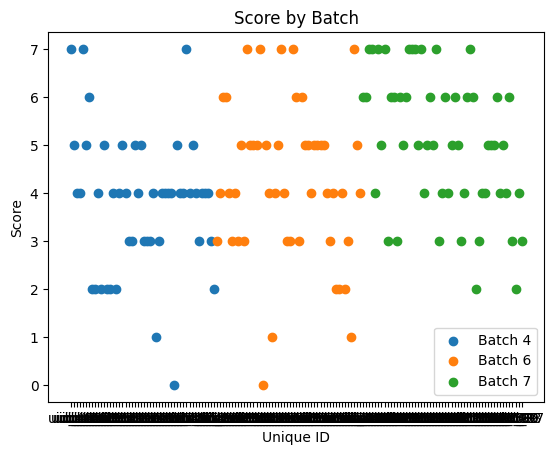

In [81]:
import matplotlib.pyplot as plt
batch_4 = input_data[input_data['batch'] == 'AI_ELITE_4']
batch_6 = input_data[input_data['batch'] == 'AI_ELITE_6']
batch_7 = input_data[input_data['batch'] == 'AI_ELITE_7']

# Create a scatter plot for each batch
plt.scatter(batch_4['user_id'], batch_4['score'], label='Batch 4')
plt.scatter(batch_6['user_id'], batch_6['score'], label='Batch 6')
plt.scatter(batch_7['user_id'], batch_7['score'], label='Batch 7')

# Set the plot title and axis labels
plt.title('Score by Batch')
plt.xlabel('Unique ID')
plt.ylabel('Score')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()





as we can see from the scatter plot that what range of students from each batch has performed in that particular marks . Comparing to the other batches 7 has superior performance.